<a href="https://colab.research.google.com/github/BUFONJOKER/real-estate-dataset/blob/main/real_estate_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [97]:
df = pd.read_csv("real estate.csv")

In [98]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [99]:
#  Attribute Information:

## 1. CRIM      per capita crime rate by town
## 2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
## 3. INDUS     proportion of non-retail business acres per town
## 4. BoundRiver      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
## 5. NOX       nitric oxides concentration (parts per 10 million)
## 6. RM        average number of rooms per dwelling
## 7. AGE       proportion of owner-occupied units built prior to 1940
## 8. DIS       weighted distances to five Boston employment centres
## 9. RAD       index of accessibility to radial highways
## 10. TAX      full-value property-tax rate per $10,000
## 11. PTRATIO  pupil-teacher ratio by town
## 12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
## 13. LSTAT    % lower status of the population
## 14. MEDV     Median value of owner-occupied homes in $1000's

In [100]:
df = df.rename(columns={
    "CRIM":"CrimeRate",
    "BoundRiver":"BoundRiver",
    "NOX":"Pollution",
    "RM":"RoomsPerDwelling",
    "RAD":"AccesHighway",
    "PTRATIO":"Student:Teacher",
    "B":"Blacks",
    "LSTAT":"LowerStatusPeople",
    "MEDV":"MedianPrice"
})

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CrimeRate          506 non-null    float64
 1   ZN                 506 non-null    float64
 2   INDUS              506 non-null    float64
 3   BoundRiver         506 non-null    int64  
 4   Pollution          506 non-null    float64
 5   RoomsPerDwelling   506 non-null    float64
 6   AGE                506 non-null    float64
 7   DIS                506 non-null    float64
 8   AccesHighway       506 non-null    int64  
 9   TAX                506 non-null    int64  
 10  Student:Teacher    506 non-null    float64
 11  Blacks             506 non-null    float64
 12  LowerStatusPeople  506 non-null    float64
 13  MedianPrice        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [102]:
df['BoundRiver'].value_counts()

BoundRiver
0    471
1     35
Name: count, dtype: int64

In [103]:
df.dtypes

CrimeRate            float64
ZN                   float64
INDUS                float64
BoundRiver             int64
Pollution            float64
RoomsPerDwelling     float64
AGE                  float64
DIS                  float64
AccesHighway           int64
TAX                    int64
Student:Teacher      float64
Blacks               float64
LowerStatusPeople    float64
MedianPrice          float64
dtype: object

In [104]:
df.describe()

,CrimeRate,ZN,INDUS,BoundRiver,Pollution,RoomsPerDwelling,AGE,DIS,AccesHighway,TAX,Student:Teacher,Blacks,LowerStatusPeople,MedianPrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Histogram for all Atributes

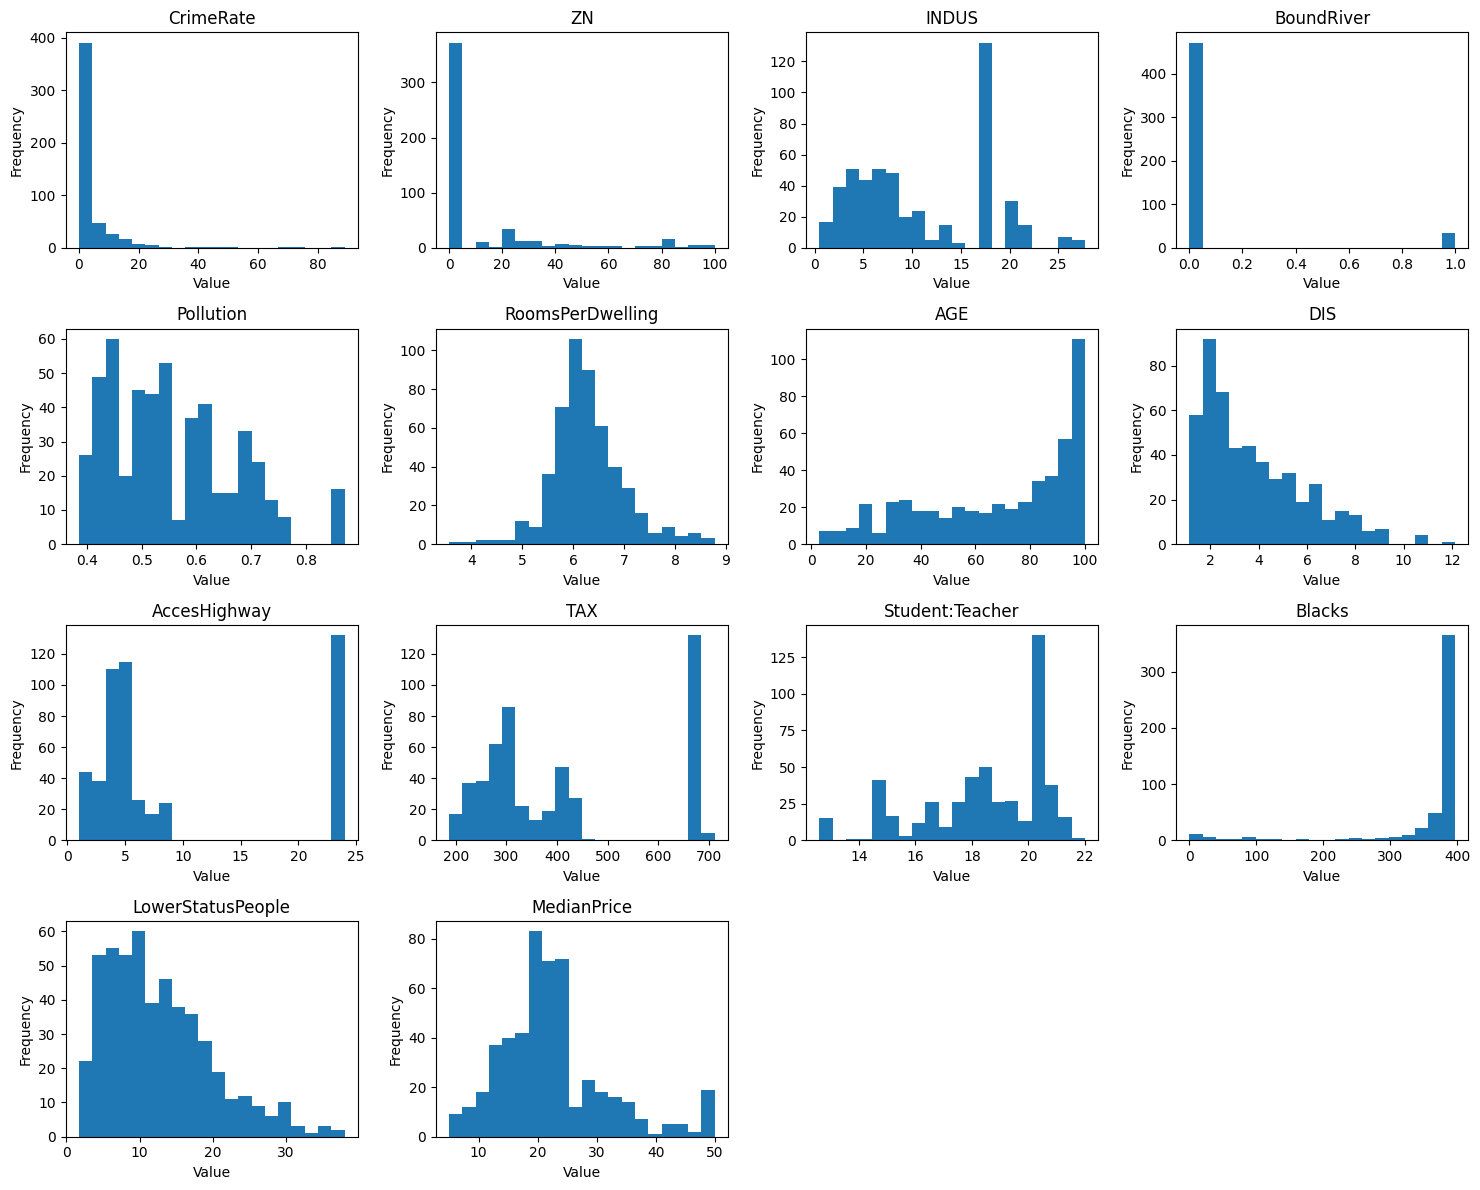

In [105]:
plt.figure(figsize=(15,12))
for i,features in enumerate(df.columns):
    plt.subplot(4,4,i+1)
    plt.hist(df[features], bins = 20)
    plt.title(features)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
plt.tight_layout()

## Train Test Data Splitting

In [106]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [107]:
df_train.shape

(404, 14)

In [108]:
df_test.shape

(102, 14)

In [110]:
df['BoundRiver'].value_counts()

BoundRiver
0    471
1     35
Name: count, dtype: int64

## Shuffling train, test Data

In [111]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,
                               test_size=0.2,
                               random_state=42)
for  train_index, test_index in split.split(df, df['BoundRiver']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [112]:
strat_test_set.head()

,CrimeRate,ZN,INDUS,BoundRiver,Pollution,RoomsPerDwelling,AGE,DIS,AccesHighway,TAX,Student:Teacher,Blacks,LowerStatusPeople,MedianPrice
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4


In [113]:
strat_train_set.head()

,CrimeRate,ZN,INDUS,BoundRiver,Pollution,RoomsPerDwelling,AGE,DIS,AccesHighway,TAX,Student:Teacher,Blacks,LowerStatusPeople,MedianPrice
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [114]:
df_test.head()

,CrimeRate,ZN,INDUS,BoundRiver,Pollution,RoomsPerDwelling,AGE,DIS,AccesHighway,TAX,Student:Teacher,Blacks,LowerStatusPeople,MedianPrice
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1


In [115]:
df_train.head()

,CrimeRate,ZN,INDUS,BoundRiver,Pollution,RoomsPerDwelling,AGE,DIS,AccesHighway,TAX,Student:Teacher,Blacks,LowerStatusPeople,MedianPrice
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2


In [116]:
95/7

13.571428571428571

In [117]:
375/29

12.931034482758621

In [118]:
df_train['BoundRiver'].value_counts()

BoundRiver
0    375
1     29
Name: count, dtype: int64

In [119]:
375/29

12.931034482758621

In [120]:
df_test['BoundRiver'].value_counts()

BoundRiver
0    96
1     6
Name: count, dtype: int64

In [121]:
96/9

10.666666666666666

In [122]:
strat_test_set['BoundRiver'].value_counts()

BoundRiver
0    95
1     7
Name: count, dtype: int64

In [123]:
95/7

13.571428571428571

In [124]:
strat_train_set['BoundRiver'].value_counts()

BoundRiver
0    376
1     28
Name: count, dtype: int64

In [125]:
376/28

13.428571428571429

In [127]:
import seaborn as sns

## Data Correleation

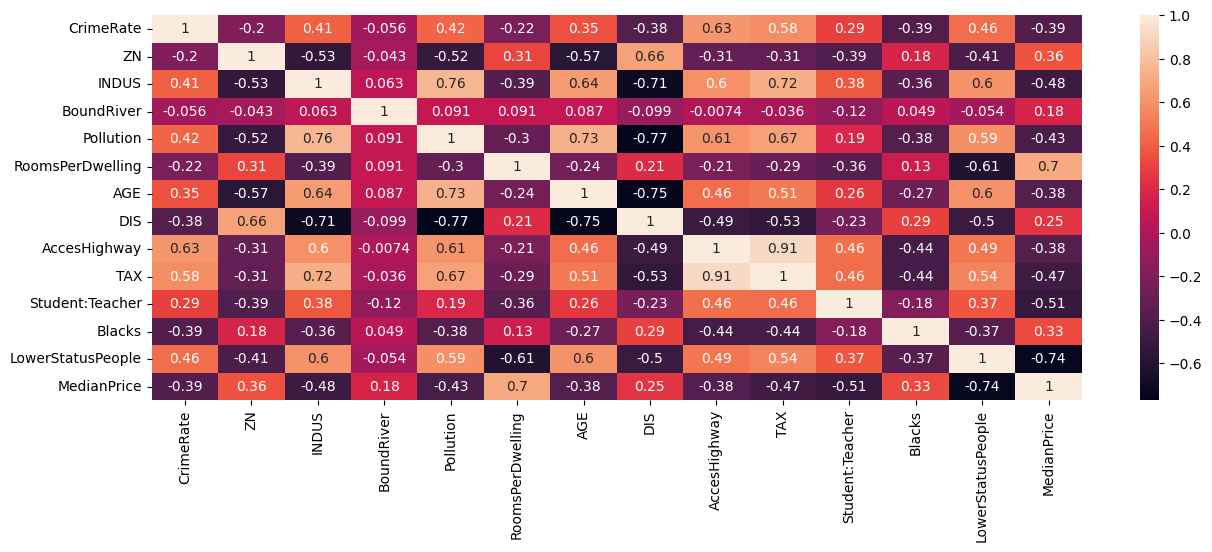

In [128]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [129]:
corr_metrix = df.corr()
corr_metrix['MedianPrice'].sort_values(ascending=False)

MedianPrice          1.000000
RoomsPerDwelling     0.695360
ZN                   0.360445
Blacks               0.333461
DIS                  0.249929
BoundRiver           0.175260
AGE                 -0.376955
AccesHighway        -0.381626
CrimeRate           -0.388305
Pollution           -0.427321
TAX                 -0.468536
INDUS               -0.483725
Student:Teacher     -0.507787
LowerStatusPeople   -0.737663
Name: MedianPrice, dtype: float64

In [130]:
df.head()

,CrimeRate,ZN,INDUS,BoundRiver,Pollution,RoomsPerDwelling,AGE,DIS,AccesHighway,TAX,Student:Teacher,Blacks,LowerStatusPeople,MedianPrice
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


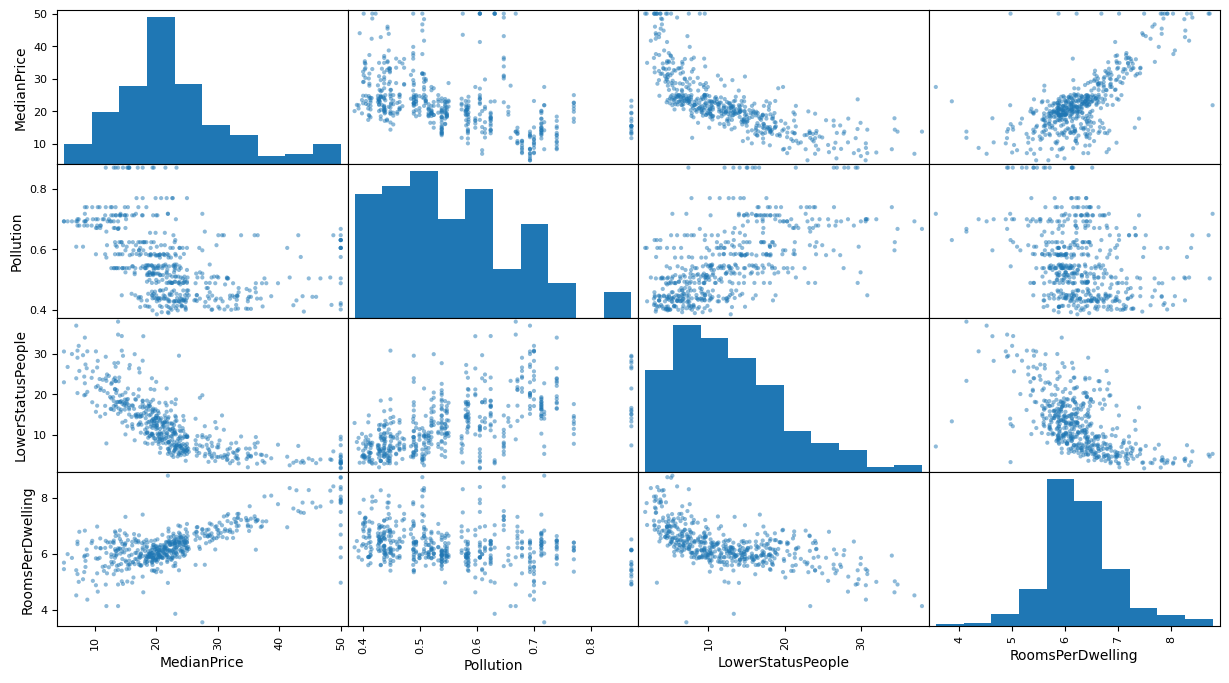

In [162]:
from pandas.plotting import scatter_matrix

attributes = ["MedianPrice","Pollution", "LowerStatusPeople","RoomsPerDwelling"]
scatter_matrix(df[attributes], figsize=(15,8))

plt.show()

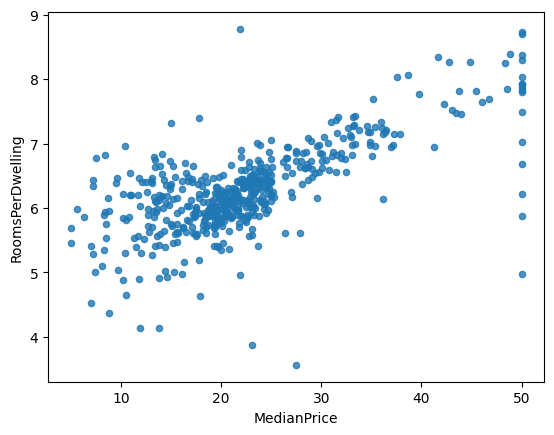

In [170]:
df.plot(kind = "scatter", x = "MedianPrice", y = "RoomsPerDwelling", alpha = 0.8)
plt.show()

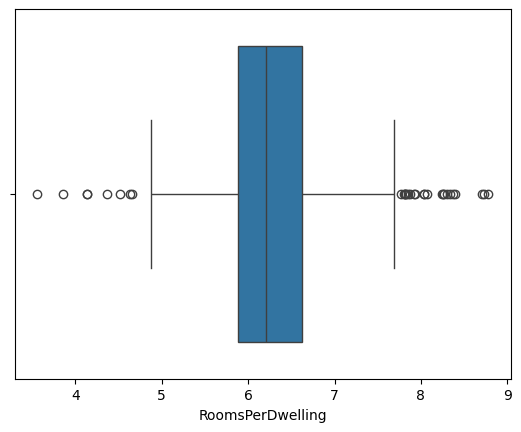

In [171]:
sns.boxplot(df, x = "RoomsPerDwelling")
plt.show()

## Atributes Combination

In [174]:
df['TaxPerRoom'] = df['TAX']/df['RoomsPerDwelling']

In [175]:
df.head()

,CrimeRate,ZN,INDUS,BoundRiver,Pollution,RoomsPerDwelling,AGE,DIS,AccesHighway,TAX,Student:Teacher,Blacks,LowerStatusPeople,MedianPrice,TaxPerRoom
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [177]:
corr_metrix = df.corr()
corr_metrix["MedianPrice"].sort_values(ascending=False)

MedianPrice          1.000000
RoomsPerDwelling     0.695360
ZN                   0.360445
Blacks               0.333461
DIS                  0.249929
BoundRiver           0.175260
AGE                 -0.376955
AccesHighway        -0.381626
CrimeRate           -0.388305
Pollution           -0.427321
TAX                 -0.468536
INDUS               -0.483725
Student:Teacher     -0.507787
TaxPerRoom          -0.537650
LowerStatusPeople   -0.737663
Name: MedianPrice, dtype: float64

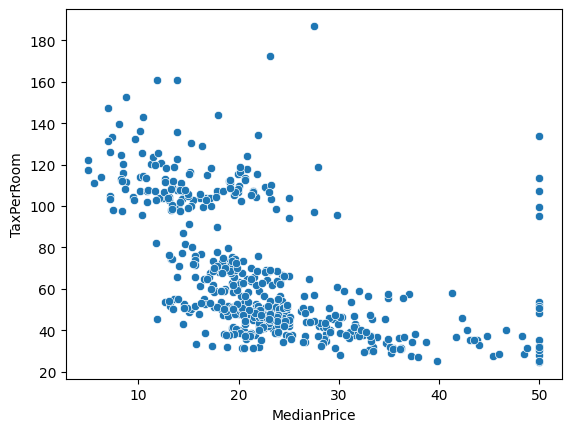

In [187]:
sns.scatterplot(df, x = "MedianPrice", y = "TaxPerRoom")
plt.show()